# Regulation

In [3]:
import sklearn.datasets as d
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import sklearn.metrics as mt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
diab = d.load_diabetes()
X_train, X_test, y_train, y_test = ms.train_test_split(
    diab.data, diab.target, test_size = 0.3, random_state = 78)

## Ridge Reg
alpha = 0.01

In [7]:
ridge = lm.Ridge(alpha = 0.01)
reg = ridge.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [9]:
coefs = pd.Series(np.round(reg.coef_, 3), index = diab.feature_names)
coefs.sort_values(ascending=False)

s5     735.286
bmi    450.733
bp     367.440
s2     239.094
s6      60.548
s4     -23.619
age    -29.339
s3     -95.215
sex   -179.510
s1    -436.699
dtype: float64

In [10]:
round(reg.intercept_, 3)

153.422

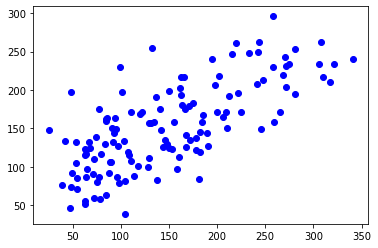

In [11]:
plt.scatter(y_test, y_pred, color = 'blue')

In [34]:
result = pd.DataFrame()
for a in [0, 0.01, 1, 10, 100]:
    ridge = lm.Ridge(alpha = a)
#     reg = ridge.fit(X_train, y_train)
    reg = ridge.fit(diab.data, diab.target)

#     y_pred = reg.predict(X_test)

    coefs = pd.Series(np.hstack([reg.coef_, reg.intercept_]), 
                      index = map(lambda x: x.upper(), diab.feature_names+ ["INTERCEPT"]))
    cname = "alpha = " + str(a)
#     result.append(coefs, ignore_index=True) 안 됨
    result[cname] = coefs

result

,alpha = 0,alpha = 0.01,alpha = 1,alpha = 10,alpha = 100
AGE,-10.012198,-7.199457,29.465746,19.812822,2.897090
SEX,-239.819089,-234.552930,-83.154885,-0.918458,0.585254
BMI,519.839787,520.583136,306.351627,75.416167,9.240719
BP,324.390428,320.523356,201.629434,55.025419,6.931321
S1,-792.184162,-380.607066,5.909369,19.924600,3.230957
S2,476.745838,150.483752,-29.515927,13.948686,2.616766
S3,101.044570,-78.591232,-152.040465,-47.553816,-6.174550
S4,177.064176,130.313059,117.311715,48.259420,6.678027
S5,751.279321,592.349587,262.944995,70.144068,8.876864
S6,67.625386,71.133768,111.878718,44.213876,5.955597


## Lasso Reg

In [36]:
lasso = lm.Lasso(alpha = 0.01)
reg = lasso.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [37]:
coefs = pd.Series(np.round(reg.coef_, 3), index = diab.feature_names)
coefs.sort_values(ascending=False)

s5     825.933
bmi    451.930
s2     400.500
bp     367.985
s6      50.191
s4       0.000
s3      -0.000
age    -27.913
sex   -177.585
s1    -643.630
dtype: float64

s3, s4가 0 -> 이 규제에서 아무 가치 없는 독립 변수.  
이런 식으로 특정 독립 변수를 탈락시킬 수 있다.

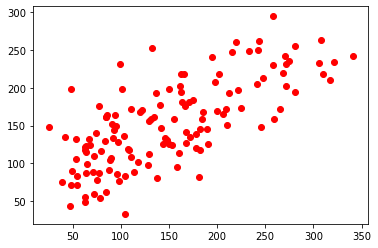

In [38]:
plt.scatter(y_test, y_pred, color = "red")

In [40]:
result = pd.DataFrame()
for a in [0, 0.01, 1, 10, 100]:
    lasso = lm.Lasso(alpha = a)
    reg = lasso.fit(X_train, y_train)

    y_pred = reg.predict(X_test)

    coefs = pd.Series(np.hstack([reg.coef_, reg.intercept_]), 
                      index = map(lambda x: x.upper(), diab.feature_names+ ["INTERCEPT"]))
    cname = "alpha = " + str(a)
#     result.append(coefs, ignore_index=True) 안 됨
    result[cname] = coefs

result

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
C:\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 453376.2486197757, tolerance: 186.12641423948216
  positive)


,alpha = 0,alpha = 0.01,alpha = 1,alpha = 10,alpha = 100
AGE,-40.650538,-27.912894,0.000000,0.000000,0.000000
SEX,-188.833784,-177.585296,0.000000,0.000000,0.000000
BMI,446.193843,451.929617,253.725556,0.000000,0.000000
BP,376.688555,367.985068,121.495100,0.000000,0.000000
S1,-1088.036363,-643.629750,0.000000,0.000000,0.000000
S2,762.812001,400.500062,0.000000,0.000000,0.000000
S3,181.587593,-0.000000,-0.000000,-0.000000,-0.000000
S4,35.485976,0.000000,0.000000,0.000000,0.000000
S5,1003.980125,825.932724,336.890966,0.000000,0.000000
S6,52.820141,50.190671,0.000000,0.000000,0.000000


alpha가 점차 증가할 때, 특정 시점에서 0으로 떨어져버린다.  
alpha = 1 이후는 데이터를 반영 안 한 것임.  
alpha = 1 정도에서, 주요 변수 추출 가능함.  

## Elastic Reg

In [51]:
elastic = lm.ElasticNet(alpha = 0.01, l1_ratio=0.5)
reg = elastic.fit(X_train, y_train)

y_pred = reg.predict(X_test)

In [52]:
coefs = pd.Series(np.round(reg.coef_, 3), index = diab.feature_names)
coefs.sort_values(ascending=False)

s5     193.035
bmi    188.291
bp     166.146
s6      97.612
s4      88.288
age     41.467
s1      17.336
s2      -6.645
sex    -15.595
s3    -113.204
dtype: float64

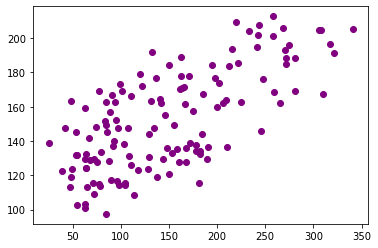

In [53]:
plt.scatter(y_test, y_pred, color = "purple")

In [54]:
result = pd.DataFrame()
for a in [0, 0.01, 1, 10, 100]:
    elastic = lm.ElasticNet(alpha = a, l1_ratio=0.5)
    reg = elastic.fit(diab.data, diab.target)

    coefs = pd.Series(np.hstack([reg.coef_, reg.intercept_]), 
                      index = map(lambda x: x.upper(), diab.feature_names+ ["INTERCEPT"]))
    cname = "alpha = " + str(a)
    result[cname] = coefs

result

C:\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
C:\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Anaconda3\envs\py36\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 631991.5781277422, tolerance: 262.1009124434389
  positive)


,alpha = 0,alpha = 0.01,alpha = 1,alpha = 10,alpha = 100
AGE,-10.012198,33.147202,0.359018,0.000000,0.000000
SEX,-239.819089,-35.245609,0.000000,0.000000,0.000000
BMI,519.839787,211.023930,3.259767,0.000000,0.000000
BP,324.390428,144.560115,2.204356,0.000000,0.000000
S1,-792.184135,21.931533,0.528646,0.000000,0.000000
S2,476.745817,0.000000,0.250935,0.000000,0.000000
S3,101.044558,-115.620017,-1.861363,-0.000000,-0.000000
S4,177.064173,100.658838,2.114454,0.000000,0.000000
S5,751.279311,185.326334,3.105841,0.000000,0.000000
S6,67.625386,96.257214,1.769851,0.000000,0.000000


In [58]:
result = pd.DataFrame()
for r in [0.01, 0.1, 0.5, 0.75, 1]:
    elastic = lm.ElasticNet(alpha = 0.01, l1_ratio=r)
    reg = elastic.fit(diab.data, diab.target)

    coefs = pd.Series(np.hstack([reg.coef_, reg.intercept_]), 
                      index = map(lambda x: x.upper(), diab.feature_names+ ["INTERCEPT"]))
    cname = "l1_ratio = " + str(r)
    result[cname] = coefs

result

,l1_ratio = 0.01,l1_ratio = 0.1,l1_ratio = 0.5,l1_ratio = 0.75,l1_ratio = 1
AGE,29.664286,30.502682,33.147202,29.228680,-1.306575
SEX,-12.201647,-14.495972,-35.245609,-74.199262,-228.822331
BMI,139.301981,148.364700,211.023930,293.577325,525.560658
BP,98.762731,104.728595,144.560115,193.700364,316.175320
S1,25.795506,25.843804,21.931533,6.387102,-307.013677
S2,13.027108,11.984279,0.000000,-21.860869,89.321688
S3,-82.521697,-87.044388,-115.620017,-146.541969,-105.081398
S4,78.111935,81.552522,100.658838,114.735471,119.597989
S5,125.786550,133.448258,185.326334,252.764800,571.330871
S6,73.338215,76.793979,96.257214,110.043179,65.007316


l1 ratio가 커져도 l2 규제가 살아있기 때문에, 원래의 lasso 회귀의 특성이 충분히 잘 반영된 회귀 계수는 아니다.  
lasso는 0으로 급격히 떨어지는데, elastic 보면 안 떨어진다.  
절충한 것이라 좋은 것처럼 보일 수 있겠지만, 무턱대고 쓸 것은 아니다.  